<a href="https://colab.research.google.com/github/SandeepaMuthukumari/Bike_Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-f43e32b42257>:4: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  from numpy import math


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

dataset=pd.read_csv('/content/drive/MyDrive/train.csv', encoding= 'ISO-8859–1')

In [5]:
dataset.head(100)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2011-01-05 04:00:00,1,0,1,1,9.84,11.365,48,15.0013,0,2,2
96,2011-01-05 05:00:00,1,0,1,1,9.02,11.365,47,11.0014,0,3,3
97,2011-01-05 06:00:00,1,0,1,1,8.20,9.850,47,15.0013,0,33,33
98,2011-01-05 07:00:00,1,0,1,1,7.38,9.090,43,12.9980,1,87,88


In [6]:
dataset.shape

(10886, 12)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
dataset.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [9]:
dataset.isnull().sum()

,0
datetime,0
season,0
holiday,0
workingday,0
weather,0
temp,0
atemp,0
humidity,0
windspeed,0
casual,0


In [10]:
# duplicate
len(dataset[dataset.duplicated()])

0

In [11]:
dataset.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

# **Exploratory Data Analysis**

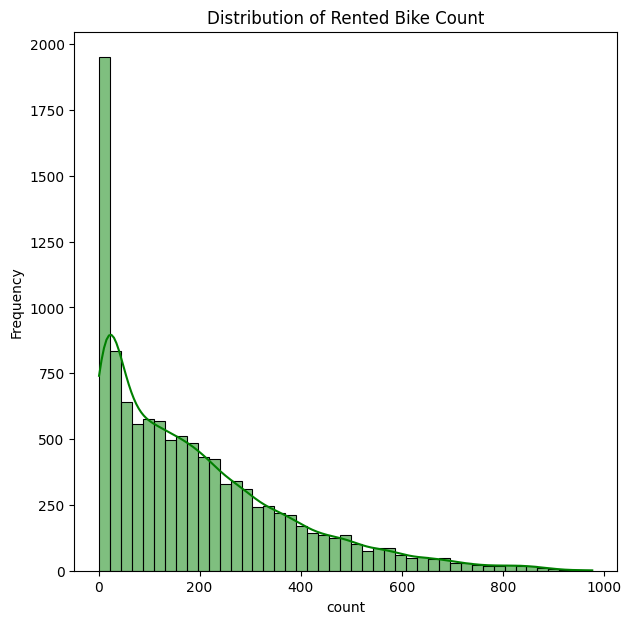

In [13]:
# Ensure that the column name is correct
if 'count' in dataset.columns:
    # Dependent variable 'Rented Bike Count'
    plt.figure(figsize=(7, 7))
    sns.histplot(dataset['count'], color="g", kde=True)  # Use histplot for newer versions of seaborn
    plt.title('Distribution of Rented Bike Count')
    plt.xlabel('count')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'Rented Bike Count' does not exist in the dataset.")

<Axes: xlabel='count', ylabel='Density'>

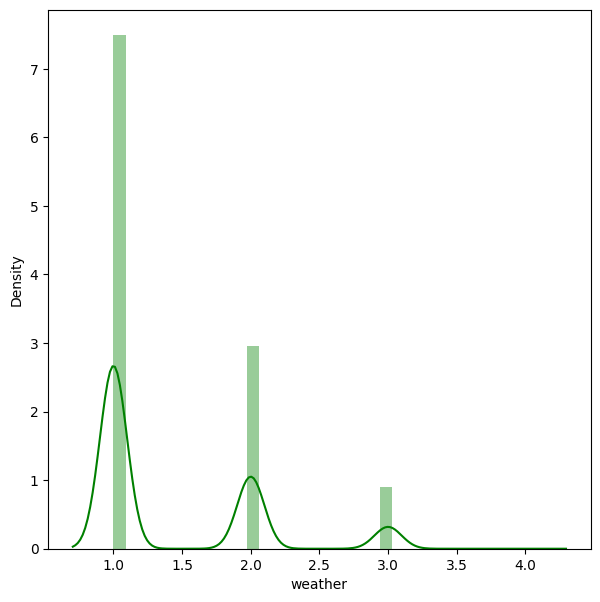

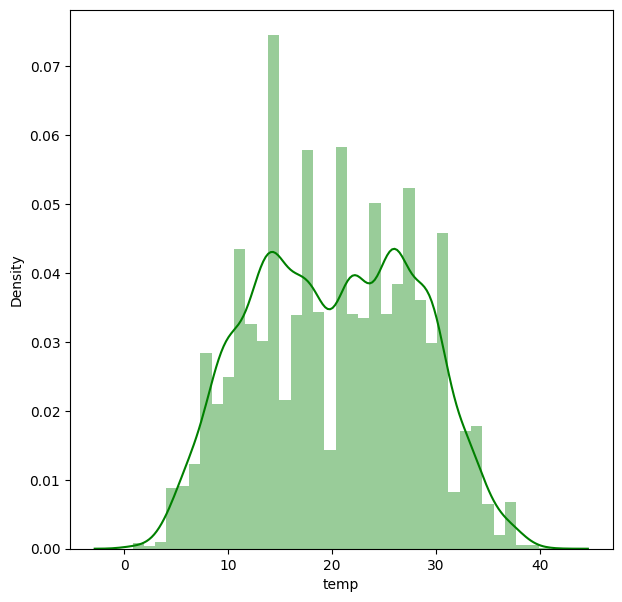

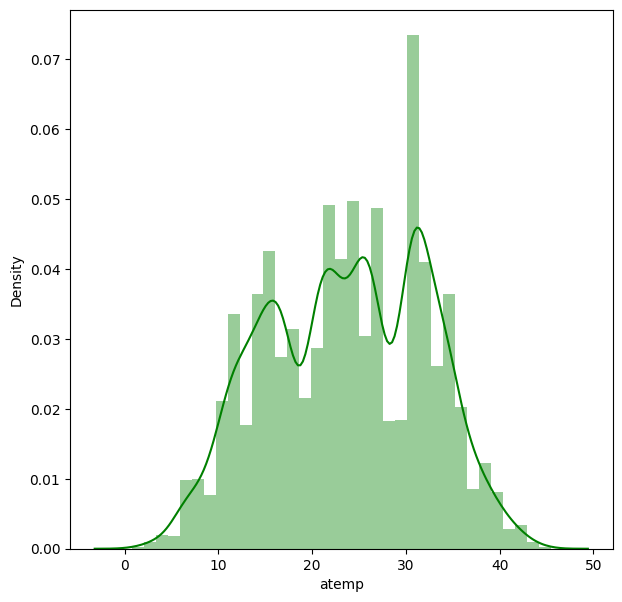

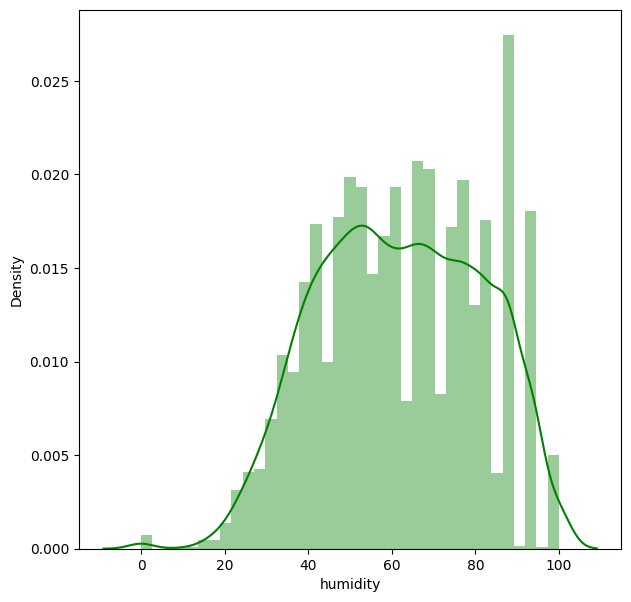

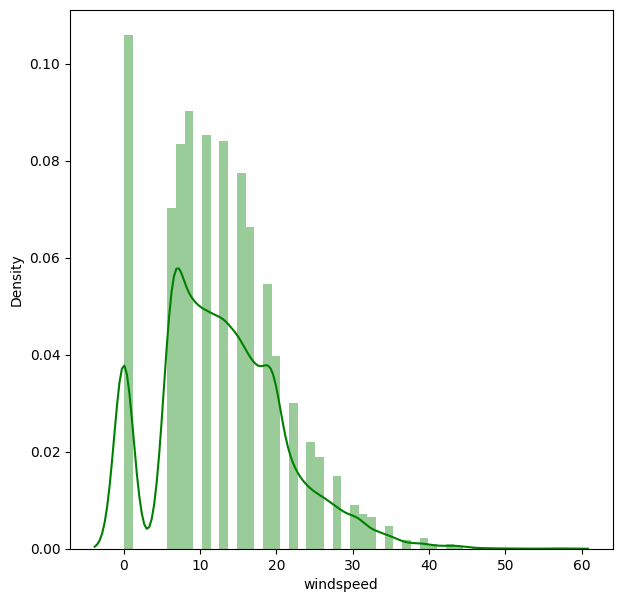

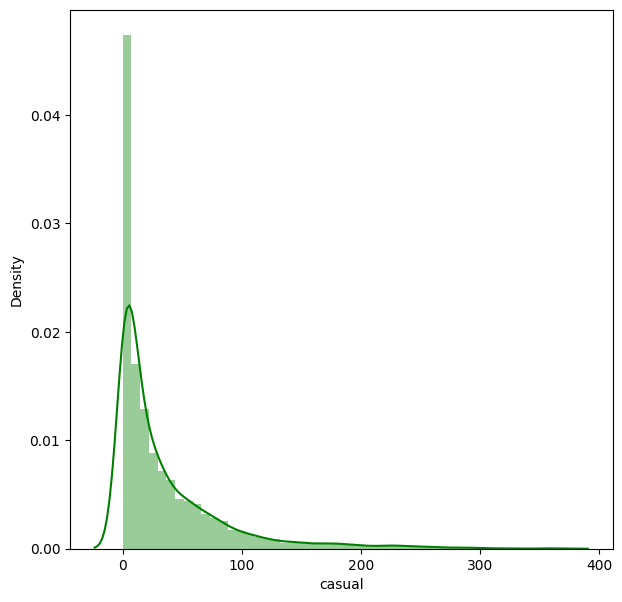

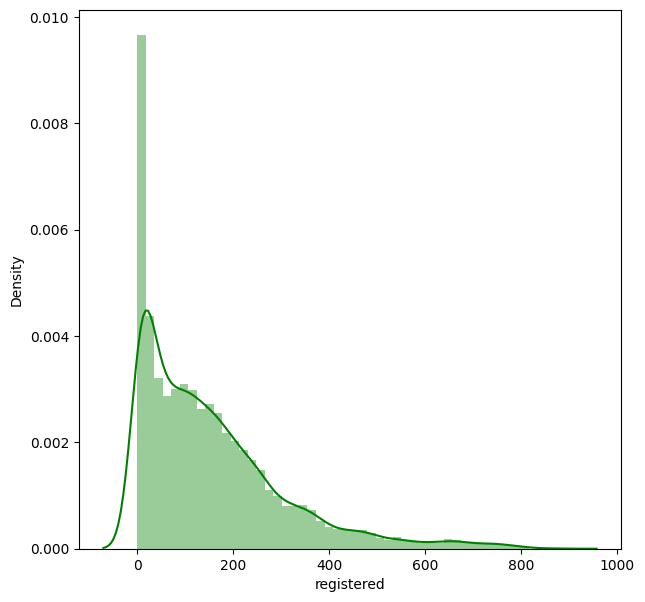

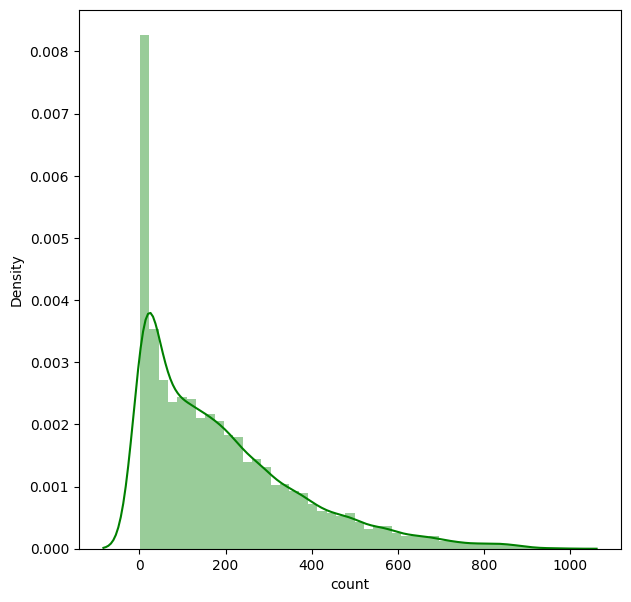

In [15]:
plt.figure(figsize=(7,7))
sns.distplot(dataset['weather'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(dataset['temp'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(dataset['atemp'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(dataset['humidity'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(dataset['windspeed'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(dataset['casual'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(dataset['registered'],color="g")

plt.figure(figsize=(7,7))
sns.distplot(dataset['count'],color="g")

In [16]:
categorical_features= ['datetime']
categorical_features

['datetime']

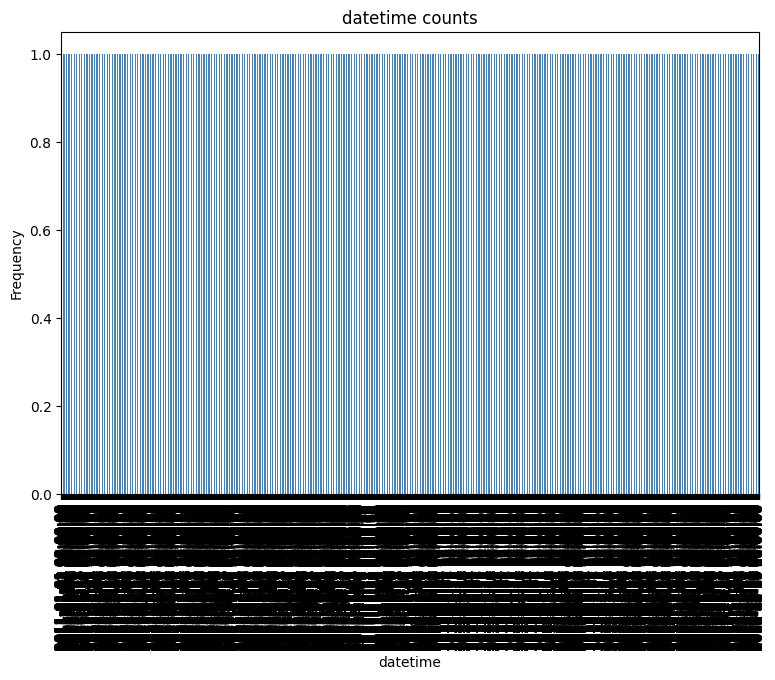

In [17]:
# Visualize counts for categorical features
for col in categorical_features:
    if col in dataset.columns:
        counts = dataset[col].value_counts().sort_index()
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        counts.plot.bar(ax=ax, color='steelblue')
        ax.set_title(col + ' counts')
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")
    else:
        print(f"Column '{col}' does not exist in the dataset.")

plt.show()

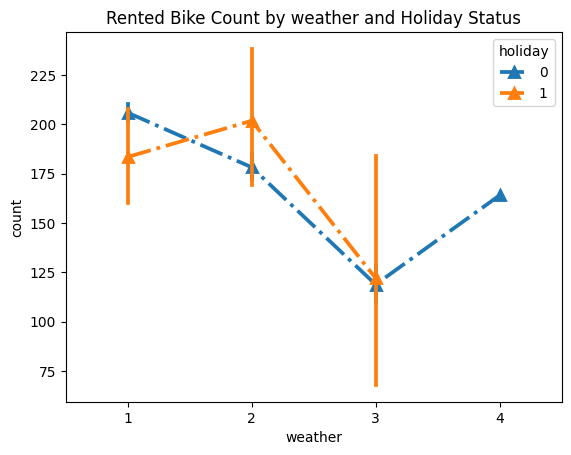

In [19]:

# Ensure that the 'Hour' and 'Rented Bike Count' columns exist
if 'weather' in dataset.columns and 'count' in dataset.columns:
    # Create the point plot
    sns.pointplot(x="weather",
                  y="count",
                  linestyles='-.',
                  markers='^',
                  hue="holiday",
                  data=dataset)
    # Show the plot
    plt.title('Rented Bike Count by weather and Holiday Status')
    plt.show()
else:
    print("One or both of the required columns ('weather', 'Rented Bike Count') do not exist in the dataset.")

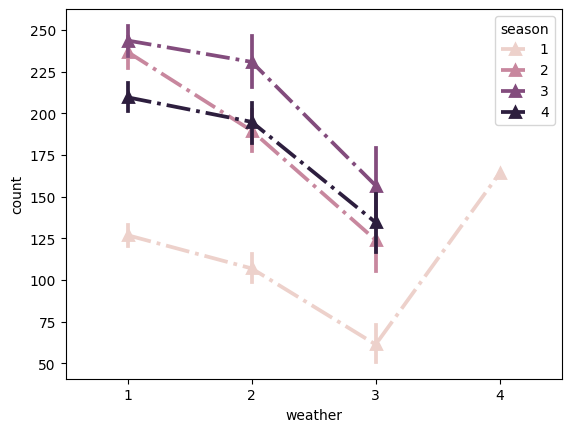

In [23]:
sns.pointplot(x = "weather",
              y = "count",
              linestyles = '-.',
              markers = '^',
              hue = "season",
              data = dataset)
# show the plot
plt.show()

In [24]:

# Ensure that the 'Date' column exists
if 'datetime' in dataset.columns:
    # Convert the 'Date' column to datetime format
    dataset['datetime'] = pd.to_datetime(dataset['datetime'])
    print("datetime column converted to datetime format.")
else:
    print("Column 'datetime' does not exist in the dataset.")

datetime column converted to datetime format.


In [25]:

# Ensure that the 'Date' column exists before conversion
if 'datetime' in dataset.columns:
    # Convert the 'Date' column to datetime format
    dataset['datetime'] = pd.to_datetime(dataset['datetime'])

    # Extract month and day of the week
    dataset['month'] = dataset['datetime'].dt.month
    dataset['day_of_week'] = dataset['datetime'].dt.day_name()

    # Drop the original 'datetime' columns
    dataset = dataset.drop(columns=['datetime'], axis=1)

    print("Feature extraction complete. Updated dataset columns:")
    print(dataset.columns)
else:
    print("Column 'datetime' does not exist in the dataset.")

Feature extraction complete. Updated dataset columns:
Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'month',
       'day_of_week'],
      dtype='object')


Numeric dataset shape: (10886, 12)


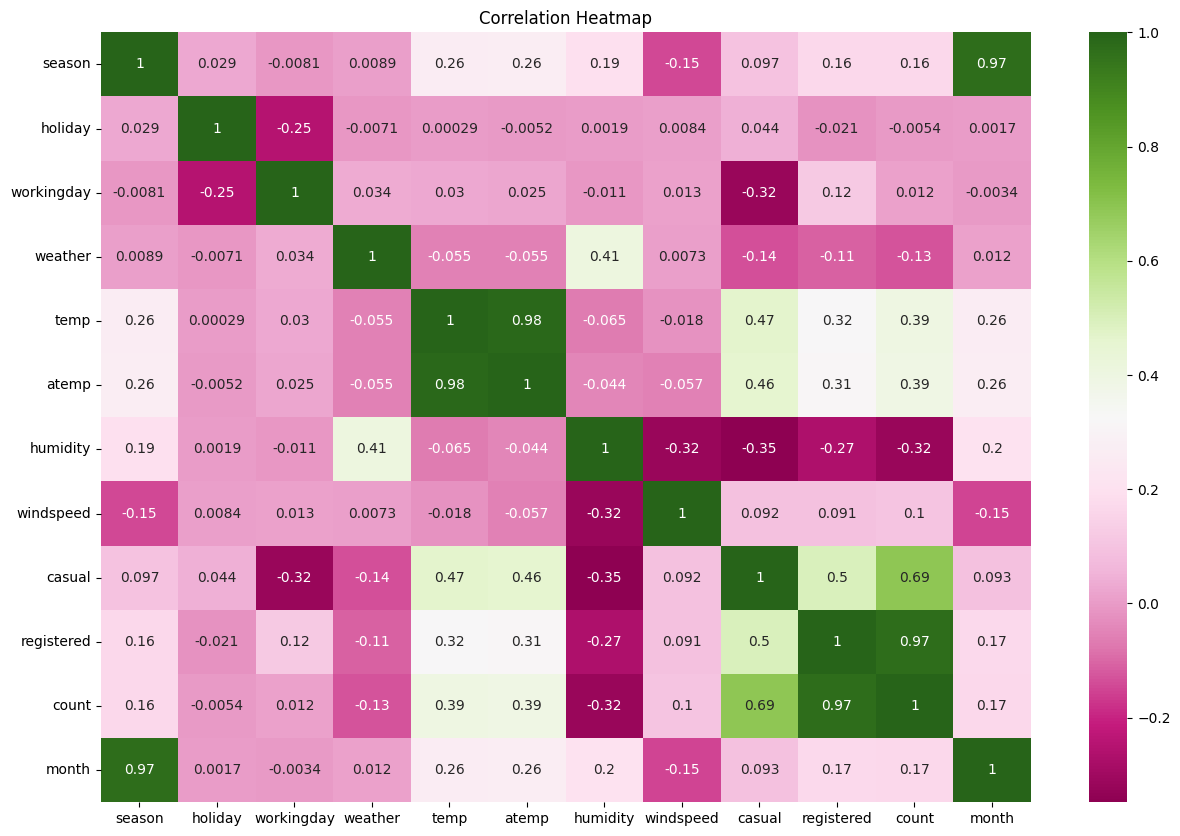

In [26]:

# Optionally, convert categorical variables to numeric (if applicable)
# dataset = pd.get_dummies(dataset, drop_first=True)  # Uncomment if needed

# Drop non-numeric columns if necessary
numeric_dataset = dataset.select_dtypes(include=['number'])  # Select only numeric columns

# Check the shape of the numeric dataset
print("Numeric dataset shape:", numeric_dataset.shape)

# Checking correlation using heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_dataset.corr(), cmap='PiYG', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [27]:
# Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [28]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['Rented Bike Count','Dew point temperature(°C)'] ]])

,variables,VIF
0,season,100.494631
1,holiday,1.114789
2,workingday,4.111358
3,weather,7.373200
4,temp,264.744473
5,atemp,293.535892
6,humidity,12.969394
7,windspeed,3.145890
8,casual,inf
9,registered,inf


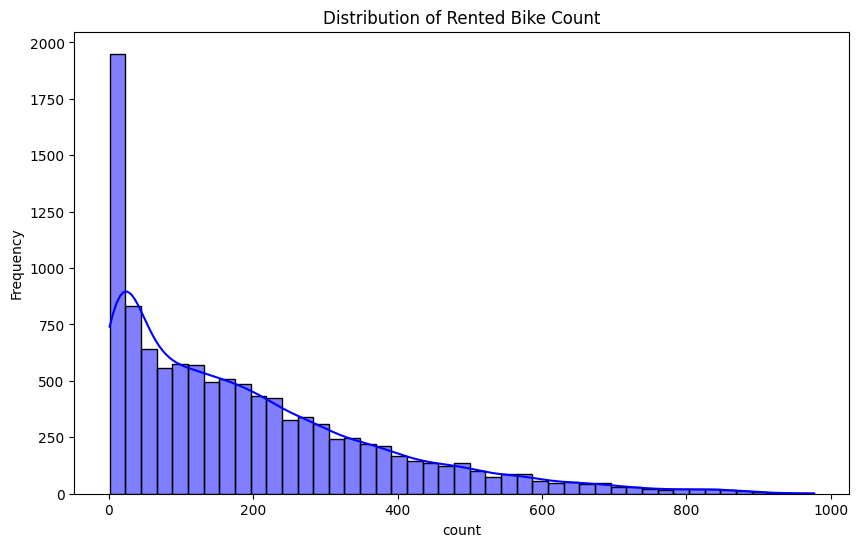

In [29]:
# Ensure that the 'Rented Bike Count' column exists
if 'count' in dataset.columns:
    # Visualizing the distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(dataset['count'], kde=True, color='blue')  # Using histplot for better clarity
    plt.title('Distribution of Rented Bike Count')
    plt.xlabel('count')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'Rented Bike Count' does not exist in the dataset.")

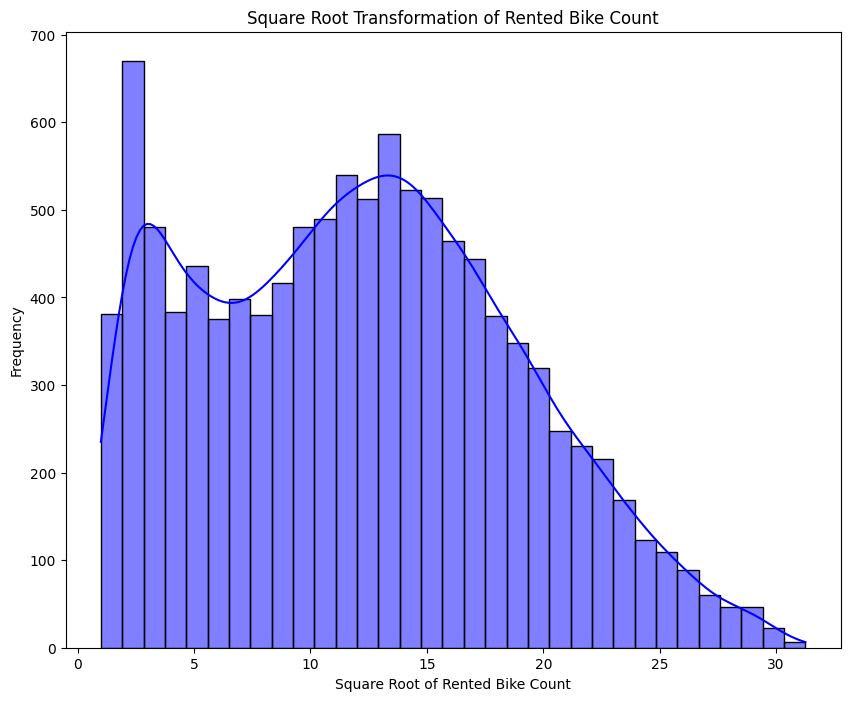

In [30]:
# Ensure that the 'Rented Bike Count' column exists
if 'count' in dataset.columns:
    # Square root transformation and visualizing the distribution
    plt.figure(figsize=(10, 8))
    sns.histplot(np.sqrt(dataset['count']), kde=True, color='blue')
    plt.title('Square Root Transformation of Rented Bike Count')
    plt.xlabel('Square Root of Rented Bike Count')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'Rented Bike Count' does not exist in the dataset.")

In [31]:
# Numeric Features

numeric_features= dataset.select_dtypes(exclude='object')

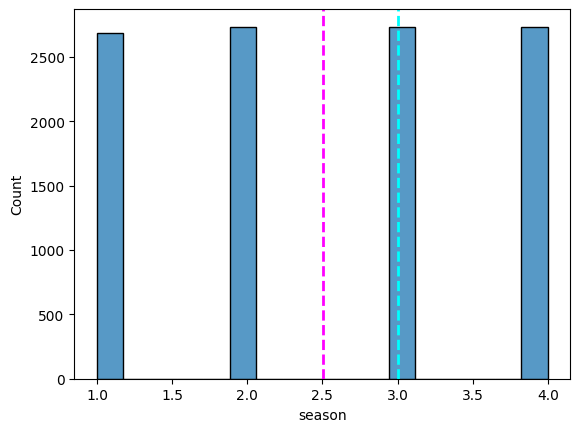

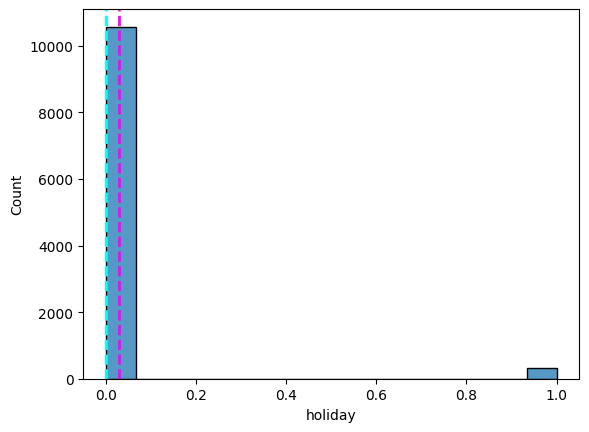

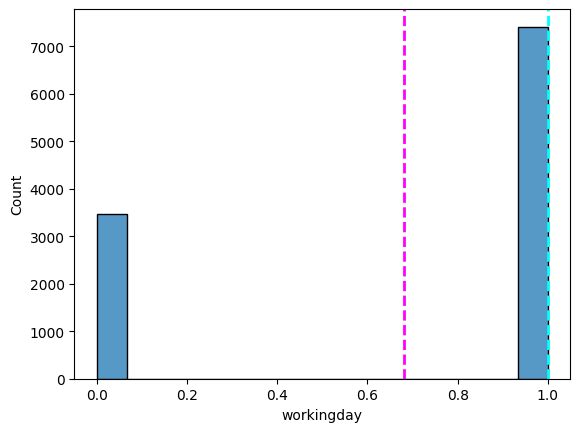

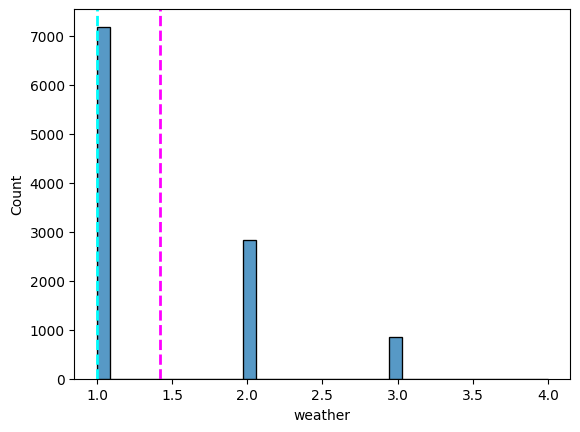

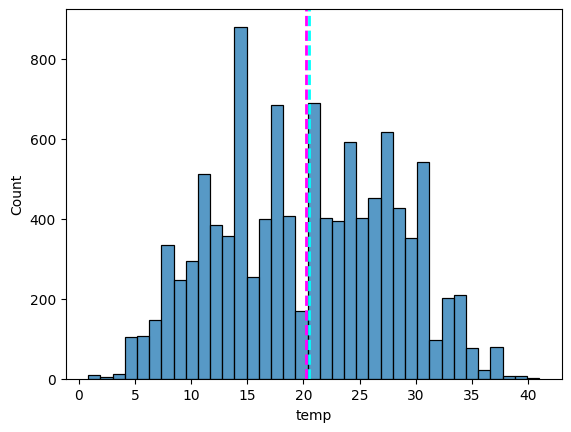

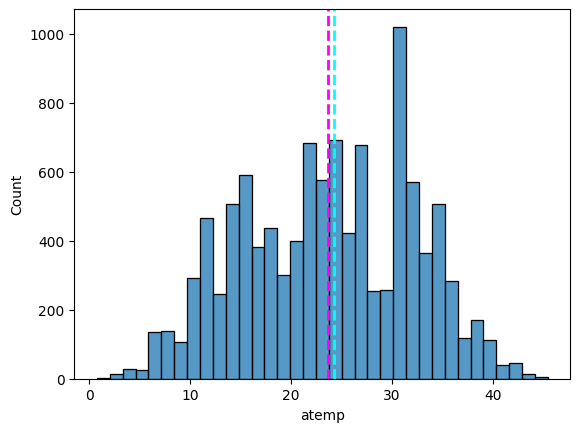

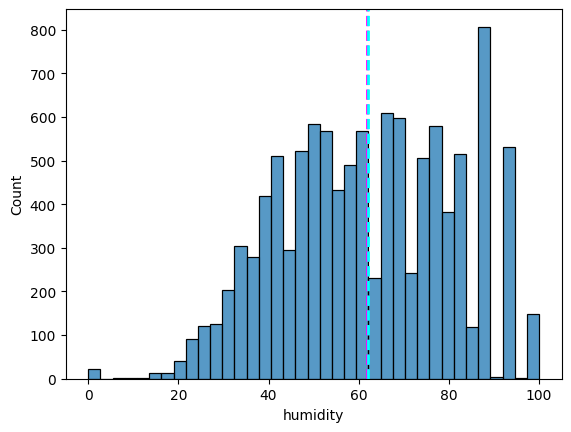

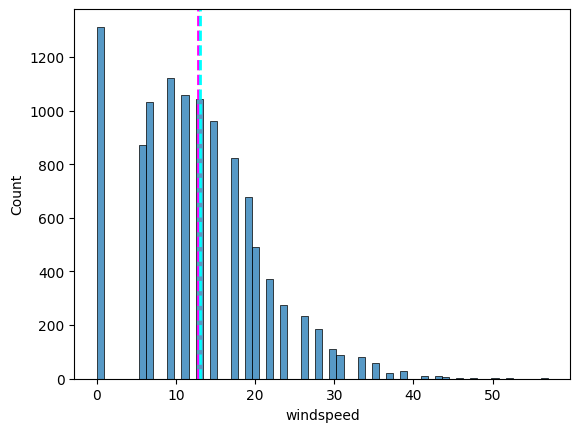

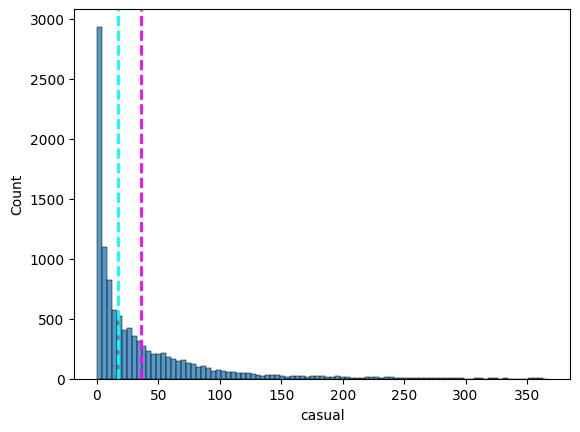

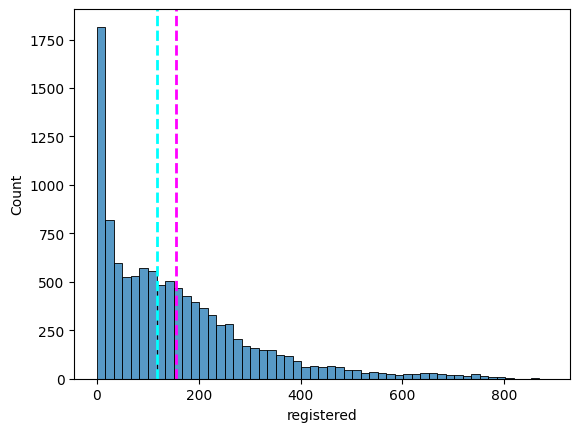

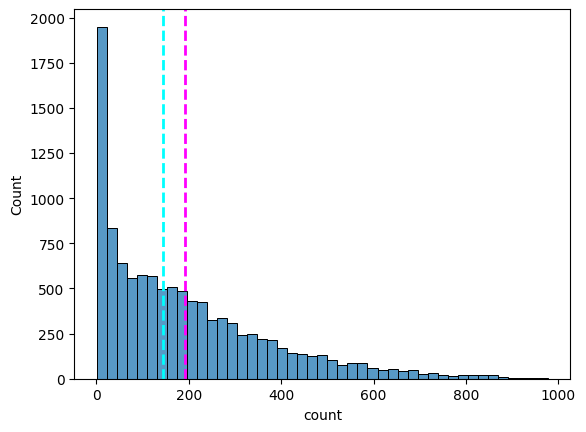

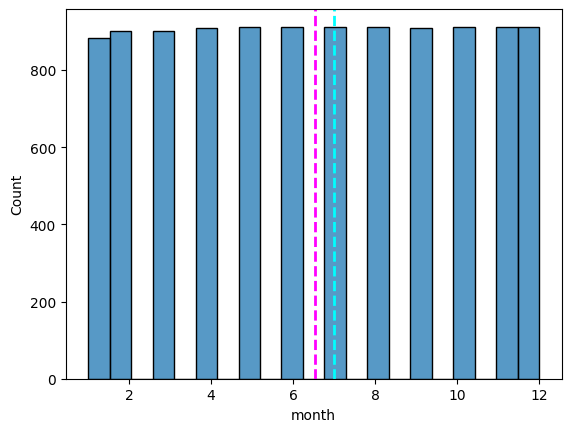

In [32]:
#plotting histogram

for col in numeric_features[:]:
  sns.histplot(dataset[col])
  plt.axvline(dataset[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(dataset[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.show()

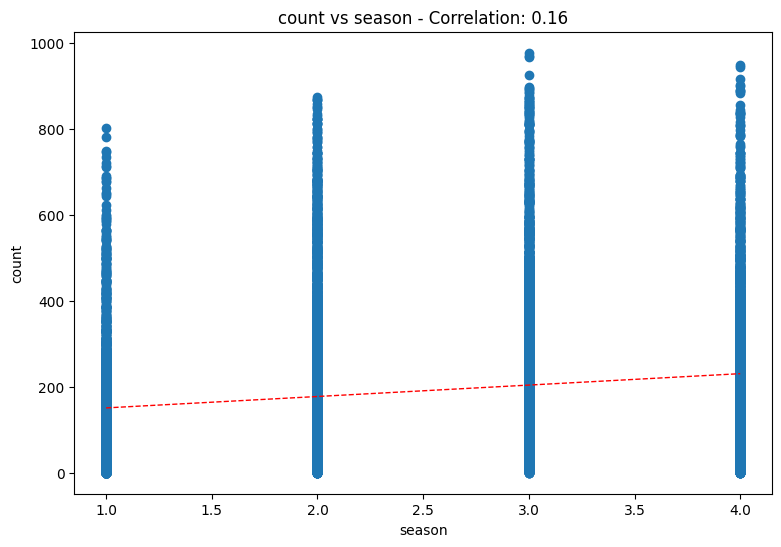

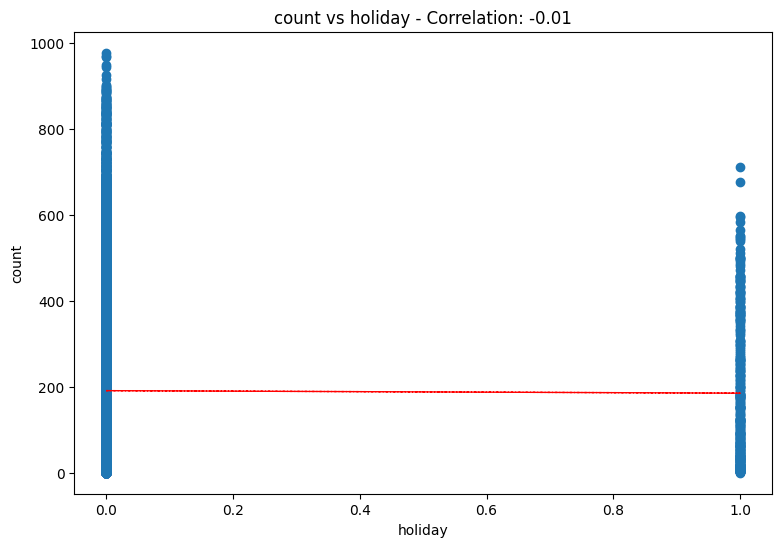

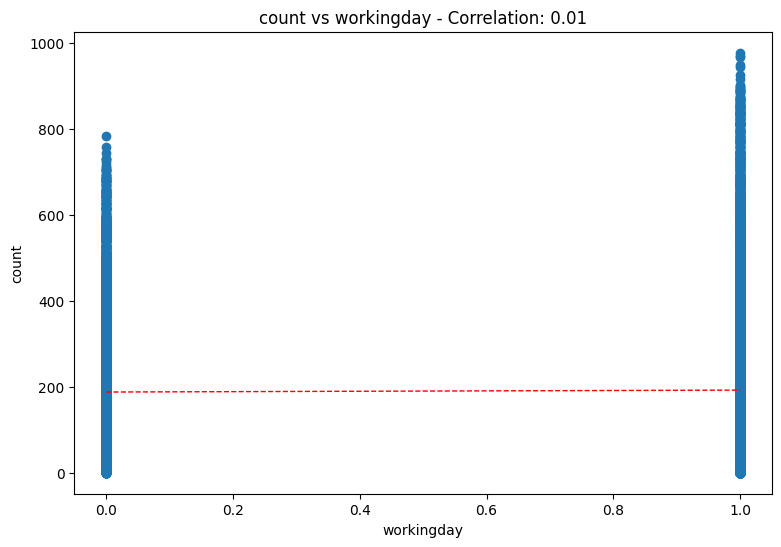

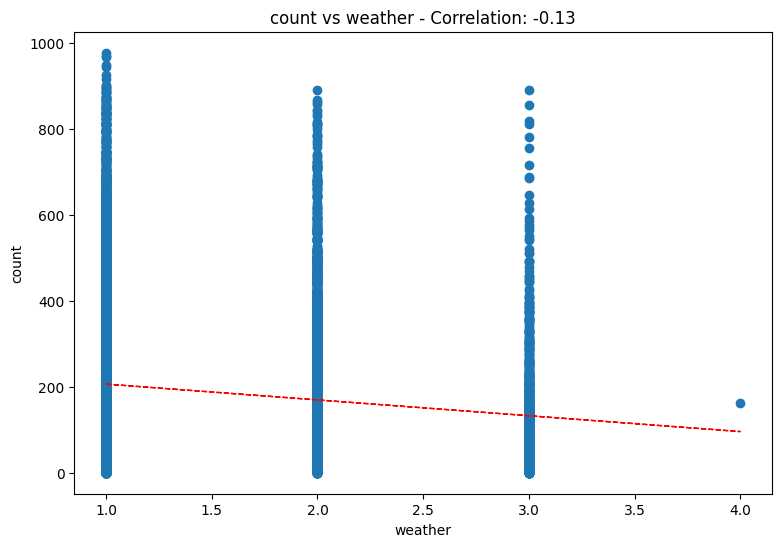

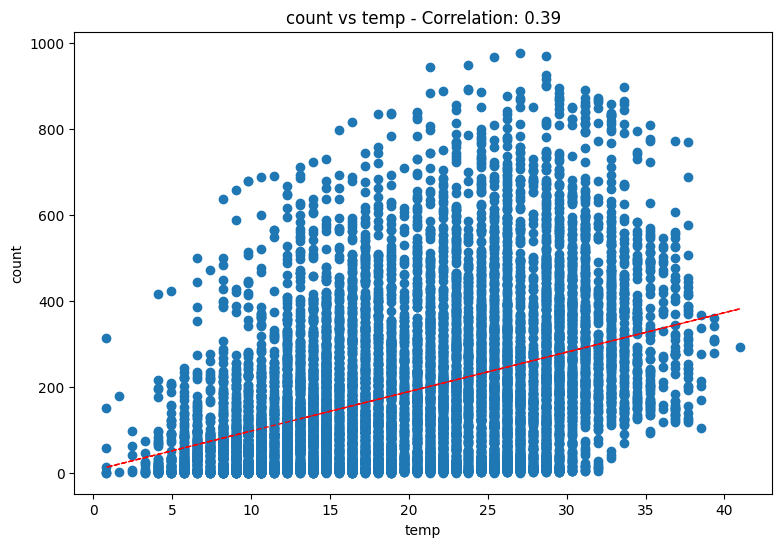

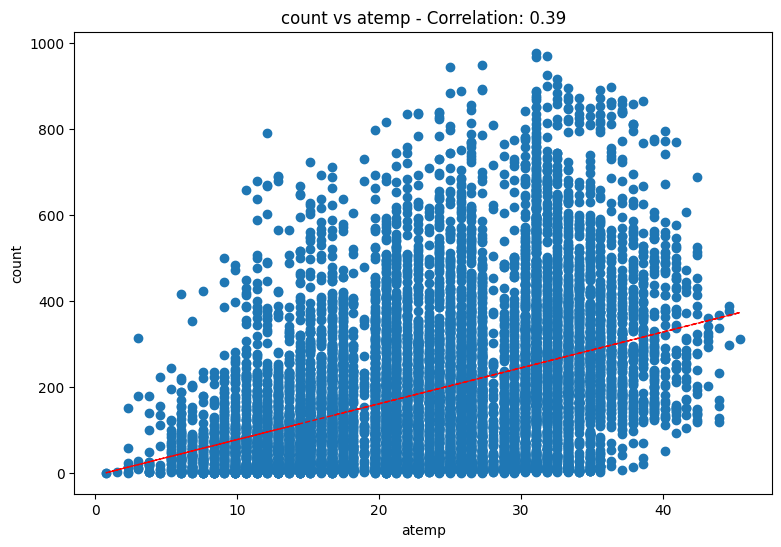

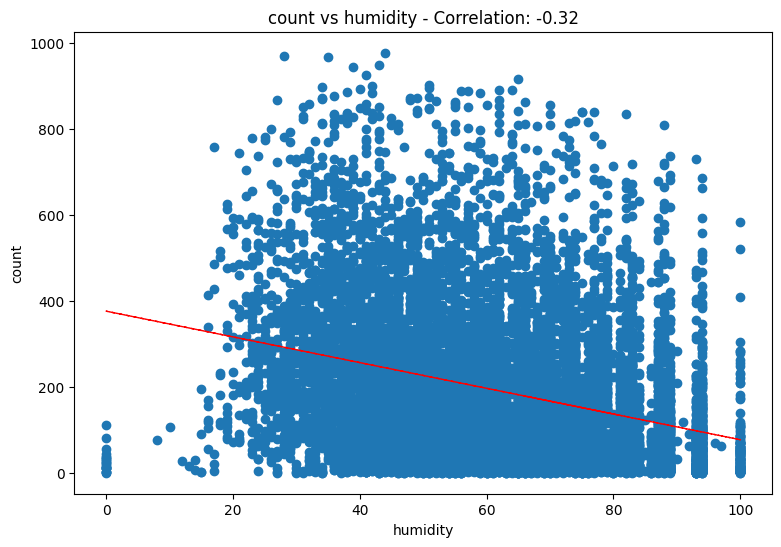

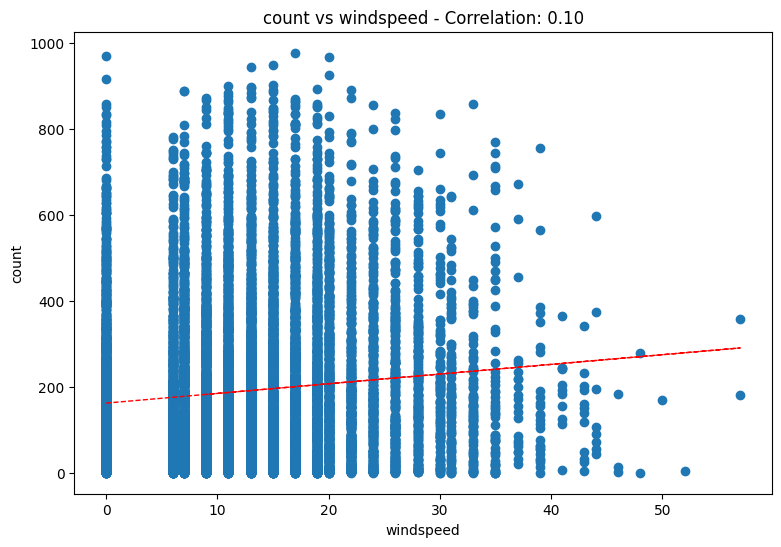

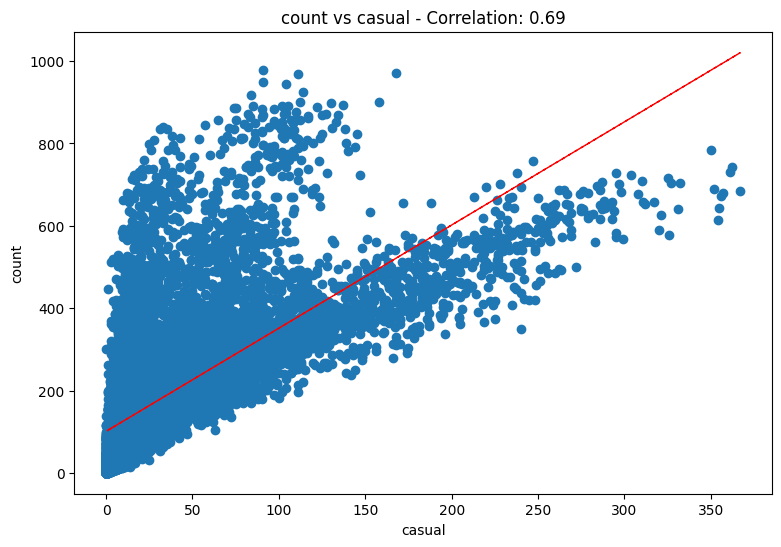

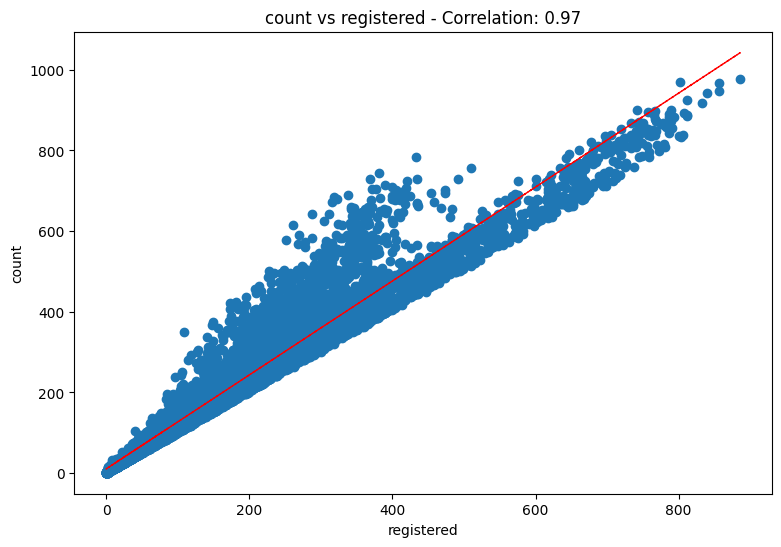

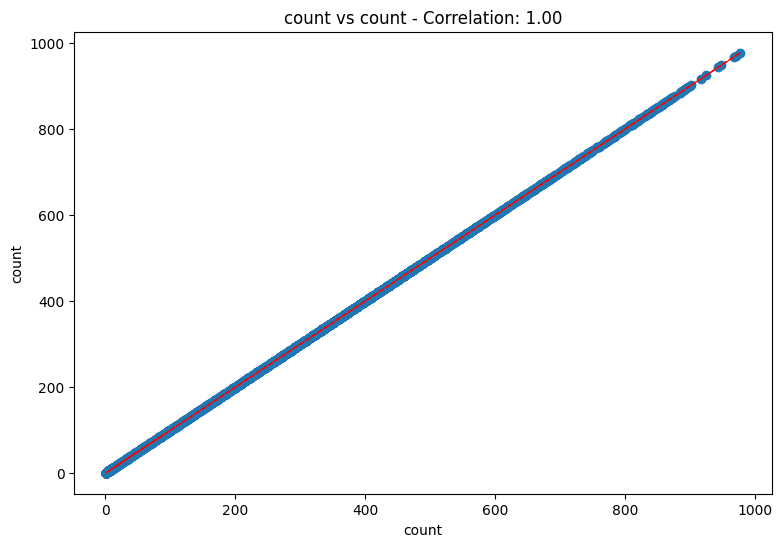

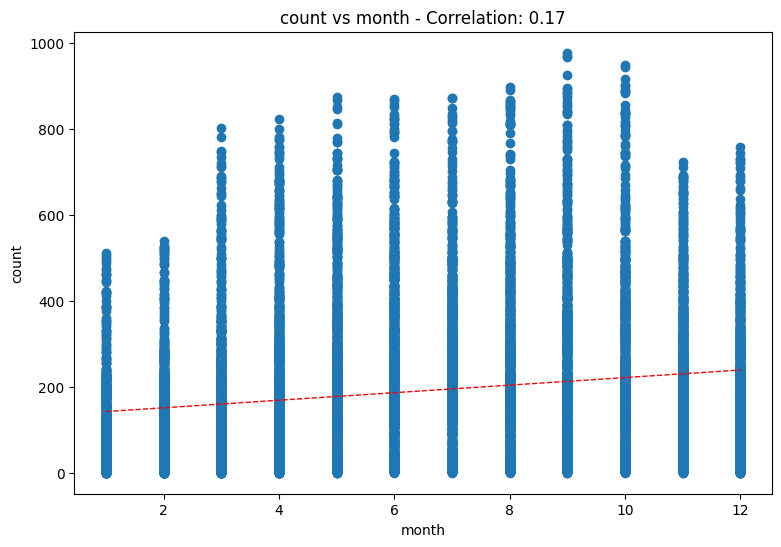

In [33]:
# Ensure that the 'Rented Bike Count' column exists
if 'count' in dataset.columns:
    for col in numeric_features[1:]:
        if col in dataset.columns:  # Check if the current numeric feature exists
            fig = plt.figure(figsize=(9, 6))
            ax = fig.gca()
            feature = dataset[col]
            label = dataset['count']
            correlation = feature.corr(label)
            plt.scatter(x=feature, y=label)
            plt.xlabel(col)
            plt.ylabel('count')
            ax.set_title(f'count vs {col} - Correlation: {correlation:.2f}')

            # Fit a line to the scatter plot
            z = np.polyfit(feature, label, 1)
            y_hat = np.poly1d(z)(feature)
            plt.plot(feature, y_hat, "r--", lw=1)
        else:
            print(f"Column '{col}' does not exist in the dataset.")
else:
    print("Column 'Rented Bike Count' does not exist in the dataset.")

In [34]:
#Extracting categorical features
categorical_features= dataset.select_dtypes(include='object')

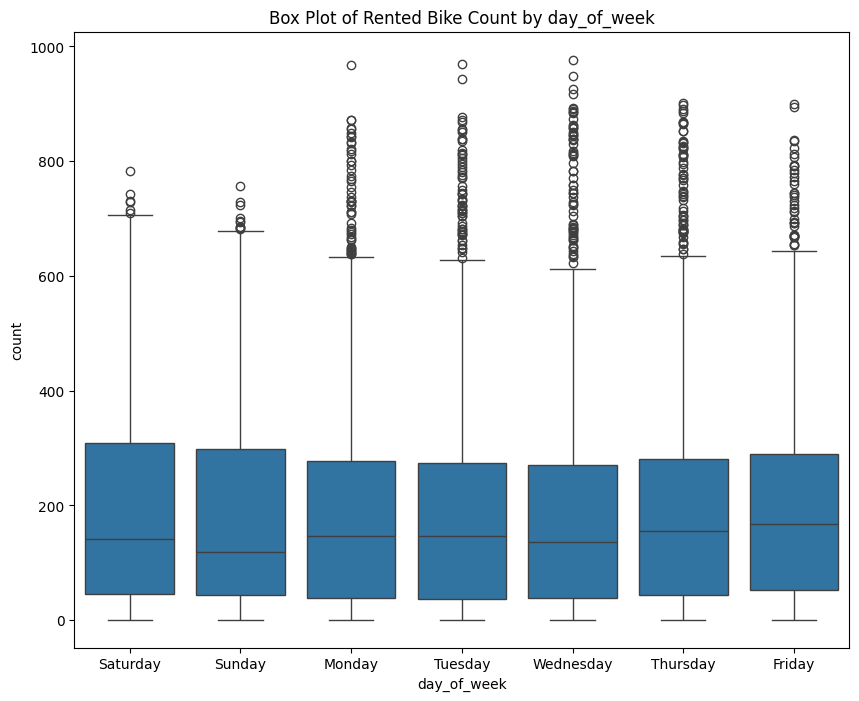

In [36]:
# Ensure that the 'Rented Bike Count' column exists
if 'count' in dataset.columns:
    for col in categorical_features:
        if col in dataset.columns:  # Check if the categorical feature exists
            plt.figure(figsize=(10, 8))
            sns.boxplot(x=dataset[col], y=dataset["count"])
            plt.title(f'Box Plot of Rented Bike Count by {col}')
            plt.xlabel(col)
            plt.ylabel('count')
            plt.show()
        else:
            print(f"Column '{col}' does not exist in the dataset.")
else:
    print("Column 'Rented Bike Count' does not exist in the dataset.")

In [37]:
# Ensure that the 'Holiday' column exists
if 'holiday' in dataset.columns:
    # Check counts of functioning days
    counts = dataset['holiday'].value_counts()
    print("holiday:")
    print(counts)
else:
    print("Column 'holiday' does not exist in the dataset.")

holiday:
holiday
0    10575
1      311
Name: count, dtype: int64


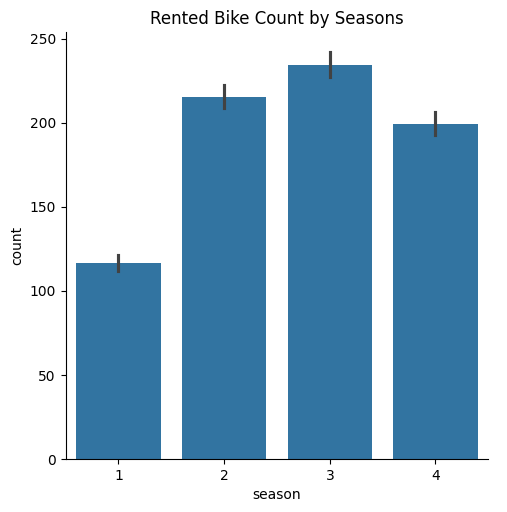

In [38]:

# Ensure that the 'Seasons' and 'Rented Bike Count' columns exist
if 'season' in dataset.columns and 'count' in dataset.columns:
    # Plotting catplot for more information
    sns.catplot(x='season', y='count', data=dataset, kind='bar')
    plt.title('Rented Bike Count by Seasons')
    plt.xlabel('season')
    plt.ylabel('count')
    plt.show()
else:
    print("One or both of the required columns ('season', 'count') do not exist in the dataset.")

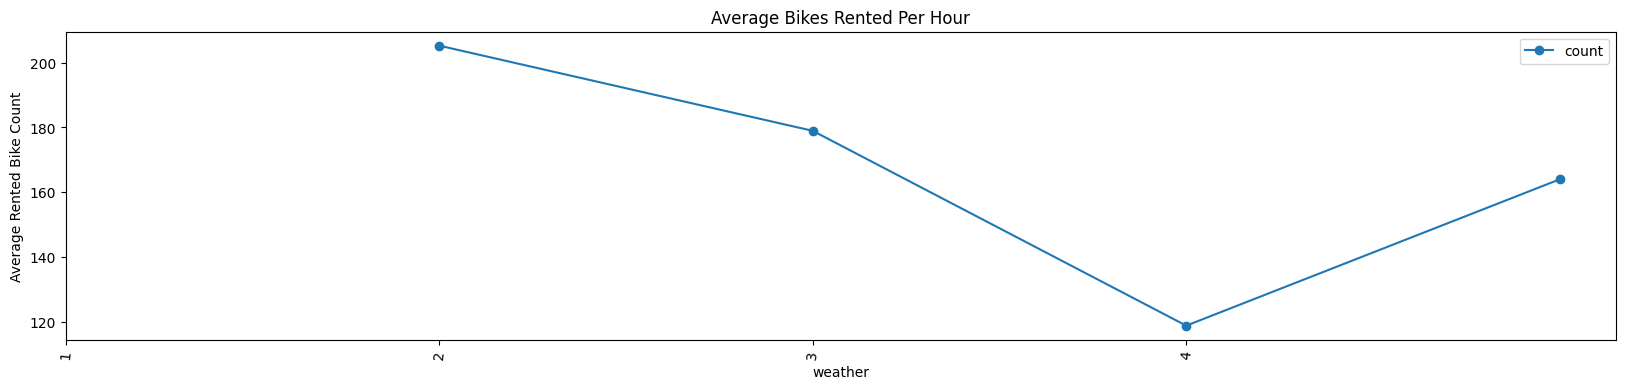

In [39]:
# Ensure that the 'Hour' column exists
if 'weather' in dataset.columns and 'count' in dataset.columns:
    # Group by Hour and get the average Bikes rented
    avg_rent_hrs = dataset.groupby('weather')['count'].mean()

    # Plot average rent over time (hrs)
    plt.figure(figsize=(20, 4))
    a = avg_rent_hrs.plot(legend=True, marker='o', title="Average Bikes Rented Per Hour")
    a.set_xticks(range(len(avg_rent_hrs)))
    a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)
    plt.xlabel('weather')
    plt.ylabel('Average Rented Bike Count')
    plt.show()
else:
    print("One or both of the required columns ('weather', 'count') do not exist in the dataset.")

In [40]:
#creating Dummy variable for categorical columns
dummy_categorical_feature= pd.get_dummies(categorical_features,drop_first=True)
dummy_categorical_feature

,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,False,True,False,False,False,False
1,False,True,False,False,False,False
2,False,True,False,False,False,False
3,False,True,False,False,False,False
4,False,True,False,False,False,False
...,...,...,...,...,...,...
10881,False,False,False,False,False,True
10882,False,False,False,False,False,True
10883,False,False,False,False,False,True
10884,False,False,False,False,False,True


In [41]:
#concating numeric columns and dummy columns and creating final df
final_df= pd.concat([dummy_categorical_feature,numeric_features],axis=1)
final_df

,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
0,False,True,False,False,False,False,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1
1,False,True,False,False,False,False,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1
2,False,True,False,False,False,False,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1
3,False,True,False,False,False,False,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1
4,False,True,False,False,False,False,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,False,False,False,False,False,True,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12
10882,False,False,False,False,False,True,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12
10883,False,False,False,False,False,True,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12
10884,False,False,False,False,False,True,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12


Column 'datetime' does not exist in the dataset.


<Figure size 2000x1600 with 0 Axes>

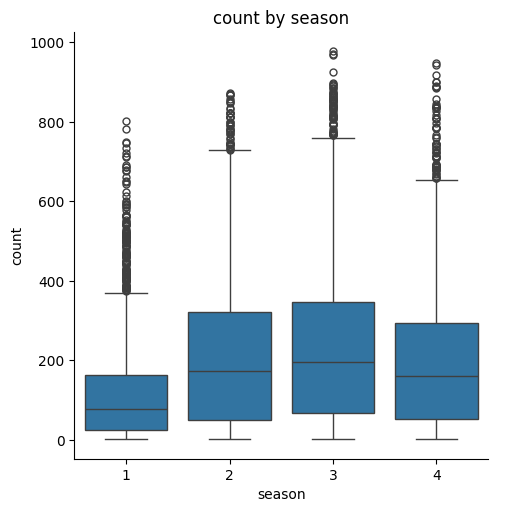

<Figure size 2000x1600 with 0 Axes>

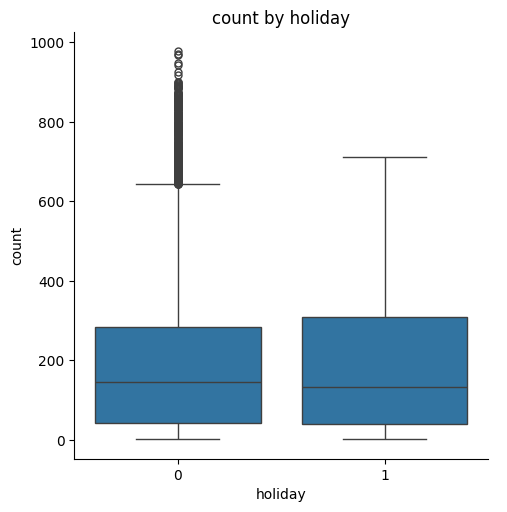

<Figure size 2000x1600 with 0 Axes>

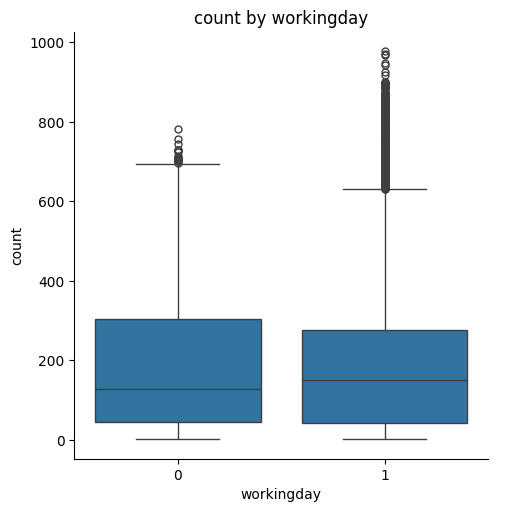

<Figure size 2000x1600 with 0 Axes>

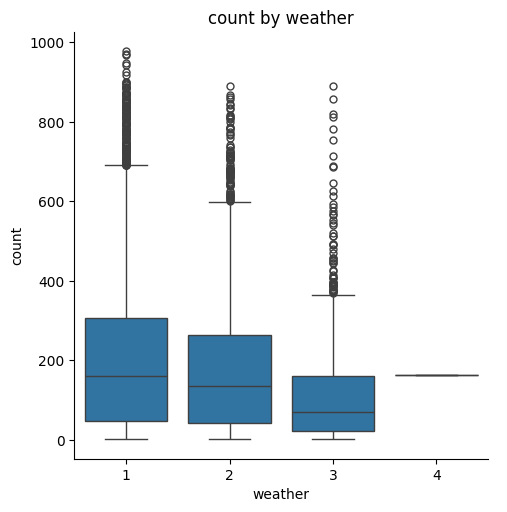

<Figure size 2000x1600 with 0 Axes>

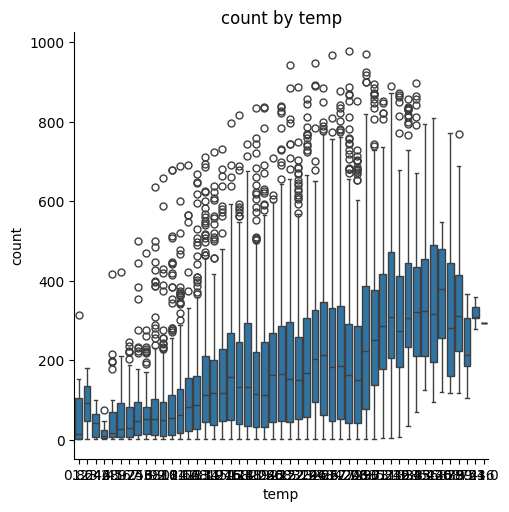

<Figure size 2000x1600 with 0 Axes>

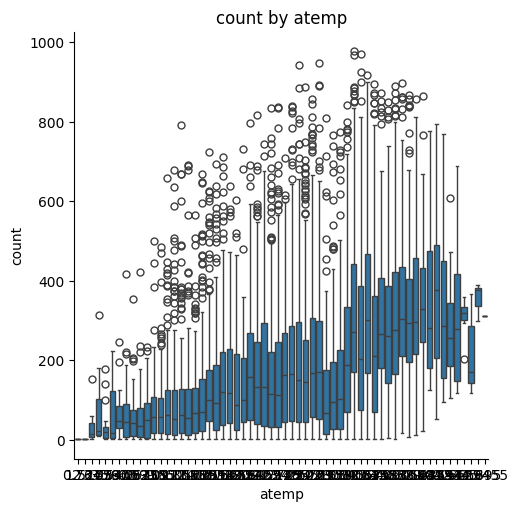

<Figure size 2000x1600 with 0 Axes>

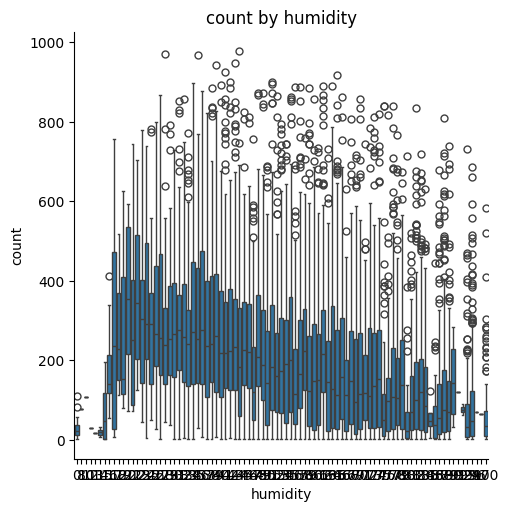

<Figure size 2000x1600 with 0 Axes>

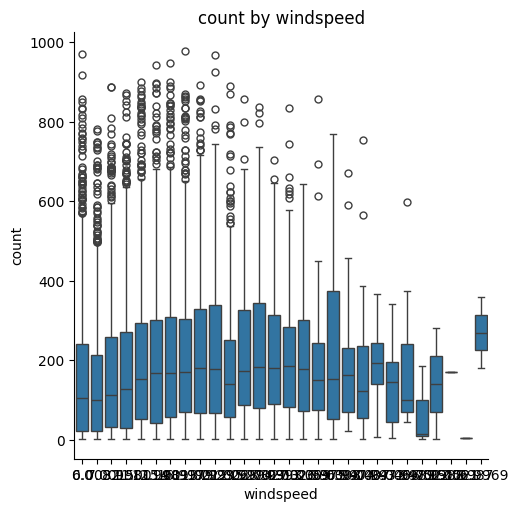

<Figure size 2000x1600 with 0 Axes>

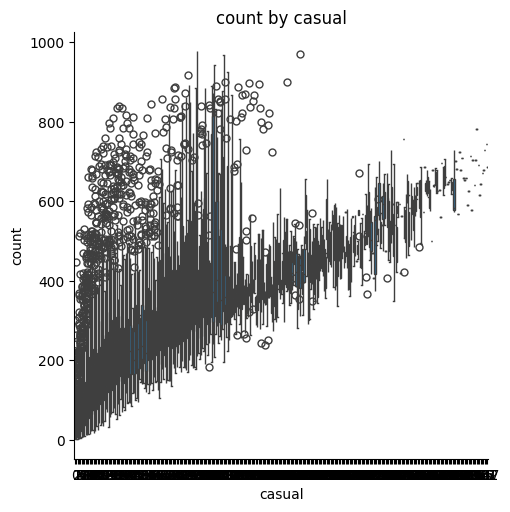

<Figure size 2000x1600 with 0 Axes>

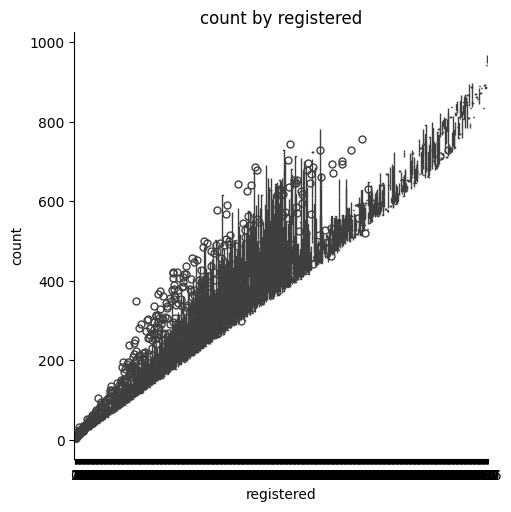

In [44]:
feature_list = ["datetime", "season", 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']

# Ensure all features are present before plotting
for feature in feature_list:
    if feature in dataset.columns:
        plt.figure(figsize=(10, 8), dpi=200)
        sns.catplot(x=feature, y='count', data=dataset, kind='box')  # Specify kind to avoid confusion
        plt.title(f'count by {feature}')
        plt.xlabel(feature)
        plt.ylabel('count')
        plt.show()
    else:
        print(f"Column '{feature}' does not exist in the dataset.")

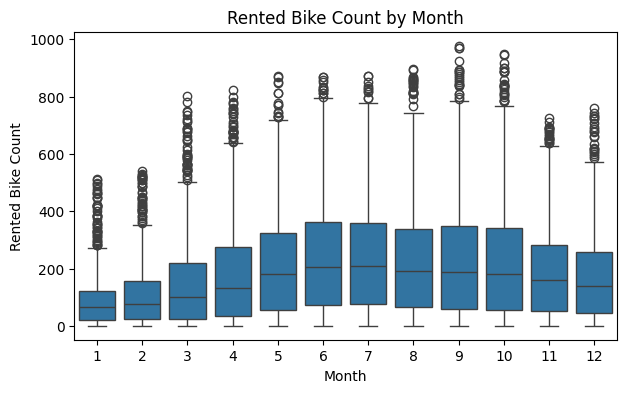

In [45]:
# Ensure that the 'month' column exists
if 'month' in dataset.columns and 'count' in dataset.columns:
    plt.figure(figsize=(7, 4), dpi=100)
    sns.boxplot(x='month', y='count', data=dataset)
    plt.title('Rented Bike Count by Month')
    plt.xlabel('Month')
    plt.ylabel('Rented Bike Count')
    plt.show()
else:
    print("One or both of the required columns ('month', 'Rented Bike Count') do not exist in the dataset.")

# If the 'month' column does not exist, create it from a 'Date' column (if applicable)
if 'Date' in dataset.columns:
    dataset['month'] = dataset['Date'].dt.month  # Create 'month' column from 'Date'

In [46]:
#creating list of matrix to store the evaluation matrix of all model
mean_sq_error=[]
root_mean_sq_error=[]
r2_list=[]
adj_r2_list=[]

In [47]:
# making a function to train and evaluate linear model
def train_linear_model (model,X_train,y_train,X_test,y_test):

#training the model
  model.fit(X_train,y_train)

  #predicting the values
  pred = model.predict(X_test)
  import math
  from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

  print('\n================Evalution Matrix=========================\n')

  #finding mean_squared_error
  MSE  = mean_squared_error(y_test**2,pred**2)
  print("MSE :" , MSE)

  #finding root mean squared error
  RMSE = np.sqrt(MSE)
  print("RMSE :" ,RMSE)

  #finding the r2 score
  r2 = r2_score(y_test**2,pred**2)
  print("R2 :" ,r2)
  #finding the adjusted r2 score
  adj_r2=1-(1-r2_score(y_test**2,pred**2))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
  print("Adjusted R2 : ",adj_r2)

  print('\n================Evalution Matrix=========================\n')


#appending metrice to list
  mean_sq_error.append(MSE)
  root_mean_sq_error.append(RMSE)
  r2_list.append(r2)
  adj_r2_list.append(adj_r2)

  # ploting the line graph of actual and predicted values
  print('\
  =========================================================\
  Evalution Graph\
  ===================================================\n')
  plt.figure(figsize=(20,10))
  plt.plot((pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.show()

In [48]:
def run_model(model,X_train,y_train,X_test,y_test):

    # Fit Model
    model.fit(X_train,y_train)

    # Get Metrics

    preds = model.predict(X_test)

    import math
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import r2_score
    print('\n================Evalution Matrix=========================\n')
    MSE  = mean_squared_error(y_test,preds)
    print("MSE :" , MSE)

    RMSE = np.sqrt(MSE)
    print("RMSE :" ,RMSE)
    r2 = r2_score(y_test,preds)
    print("R2 :" ,r2)
    adj_r2=1-(1-r2_score(y_test,preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
    print("Adjusted R2 : ",adj_r2)

    train_class_preds = linear_model.predict(X_train)

    print('\n================Evalution Matrix=========================\n')

    mean_sq_error.append(MSE)
    root_mean_sq_error.append(RMSE)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)

    #ploting
    print('\
    =========================================================\
    Evalution Graph\
    ===================================================\n')
    plt.figure(figsize=(20,10))
    plt.plot(np.array(y_test[:100]))
    plt.plot(preds[:100])
    plt.legend(["ACTUAL","PREDICTED"],prop={'size': 20})
    plt.show()

In [49]:
def get_features_importance (optimal_model,X_train):
  '''
  shows the graph of feature importance
  '''
  features = X_train.columns
  importances = optimal_model.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(15,10))
  plt.title('Feature Importance')
  plt.barh(range(len(indices)), importances[indices], color='red', align='center')
  plt.yticks(range(len(indices)), [features[i] for i in indices])
  plt.xlabel('Relative Importance')

  plt.show()

In [50]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1af390c76ed6361b0d0e62ba4e31f0b4d5c3c43997d3a1b6bebd0f0d4f1ecc5a
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [51]:
# LIME SECTION

import lime
import lime.lime_tabular
def LimeTabularExplainer_table(model,instance,num_features,dependent_var):


  X=X_test
  feature_names =list(X_test.columns)

  explainer = lime.lime_tabular.LimeTabularExplainer(X.values,feature_names=feature_names,mode='regression')

  # selecting the instace to explain
  choosen_instance = X.reset_index(drop=True).loc[[instance]].values[0]
  exp = explainer.explain_instance(choosen_instance, model.predict, num_features=num_features)
  exp.show_in_notebook(show_table=True)

In [52]:
# Train - Spliting  data
X=final_df.drop(['count'],axis=1)

In [53]:
y=np.sqrt(final_df['count'])

In [54]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [55]:
#scaling data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

# **Linear Regression**


================Evalution Matrix=========================

MSE : 3710.2677624344224
RMSE : 60.91196731705866
R2 : 0.8909191190899853
Adjusted R2 :  0.8902333295280511

================Evalution Matrix=========================

  =========================================================  Evalution Graph  ===================================================



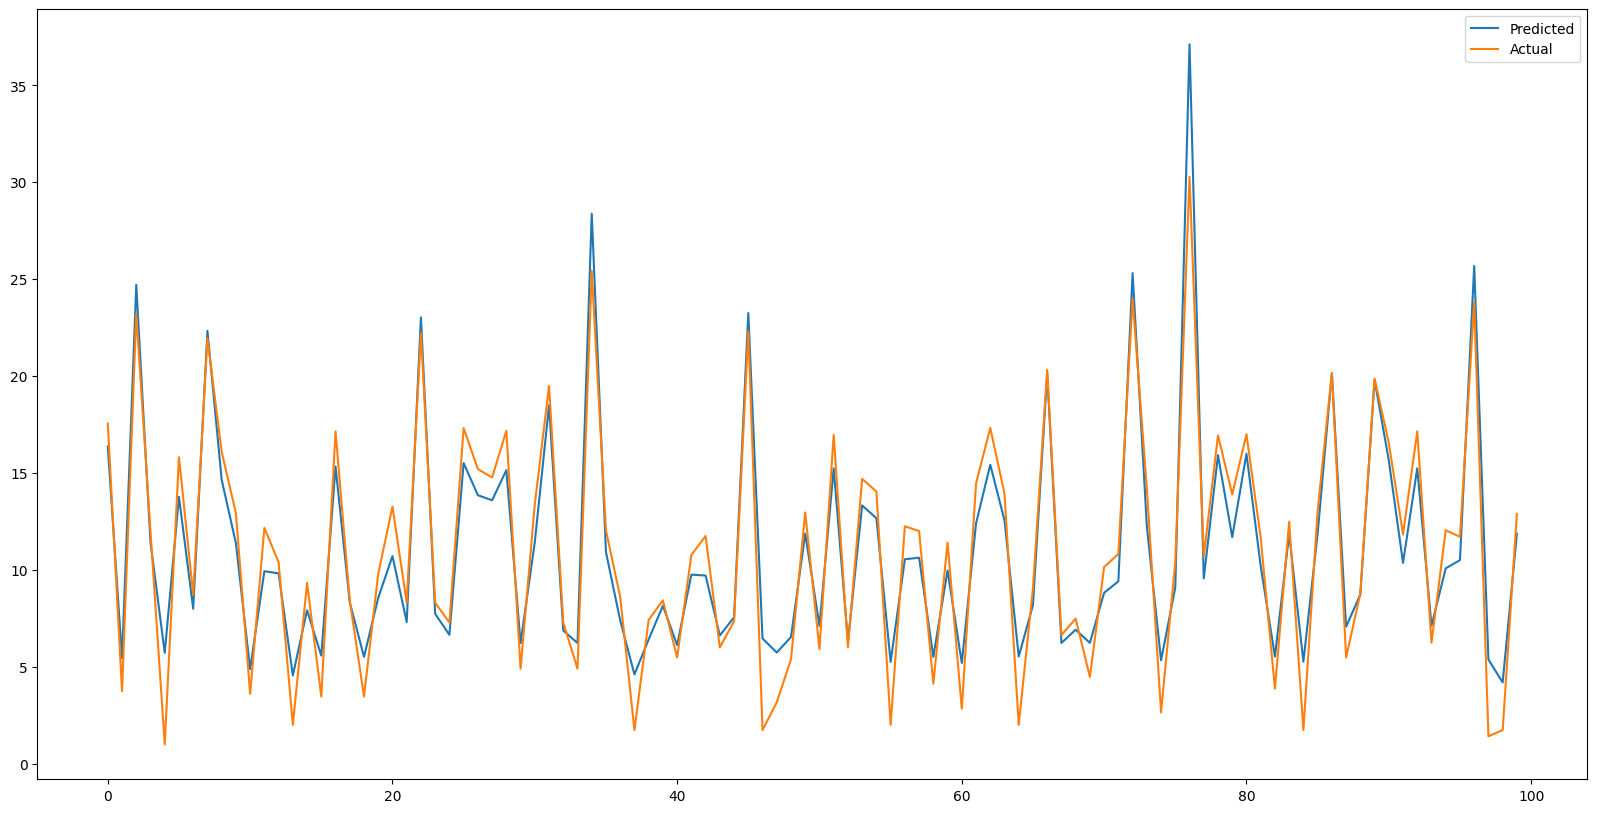

In [56]:
from sklearn.linear_model import LinearRegression
linear_model= LinearRegression()
train_linear_model(linear_model, X_train, y_train, X_test, y_test)

In [63]:
# Scale the data using scikit-learn standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Linear Regression model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

# Estimate the accuracy of the model with k-fold cross validation
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)

# Print the calculated scores
print("Cross-Validation Scores:", scores)

# Calculate the mean and standard deviation of the accuracy scores
print("Average Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

# Fit the model once again with the whole training dataset
lr_model.fit(X_train_scaled, y_train)

# Test the model performance with the test set
train_accuracy = lr_model.score(X_train_scaled, y_train)
test_accuracy = lr_model.score(X_test_scaled, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Cross-Validation Scores: [0.92643417 0.92624667 0.92669398 0.92580202 0.92835914]
Average Accuracy: 0.9267071964369107
Standard Deviation: 0.0008757932044052036
Training Accuracy: 0.9272166767131366
Test Accuracy: 0.9284746525253589


# **Random Forest**

In [57]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor

In [58]:
#creating model of random forest
rf_model = RandomForestRegressor()

In [59]:
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}

In [60]:
from sklearn.model_selection import GridSearchCV
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(rf_model,param_grid=params,verbose=0)


================Evalution Matrix=========================

MSE : 0.057771684782408884
RMSE : 0.24035741050029824
R2 : 0.9987419060253501
Adjusted R2 :  0.9987339964108645

================Evalution Matrix=========================

    =========================================================    Evalution Graph    ===================================================



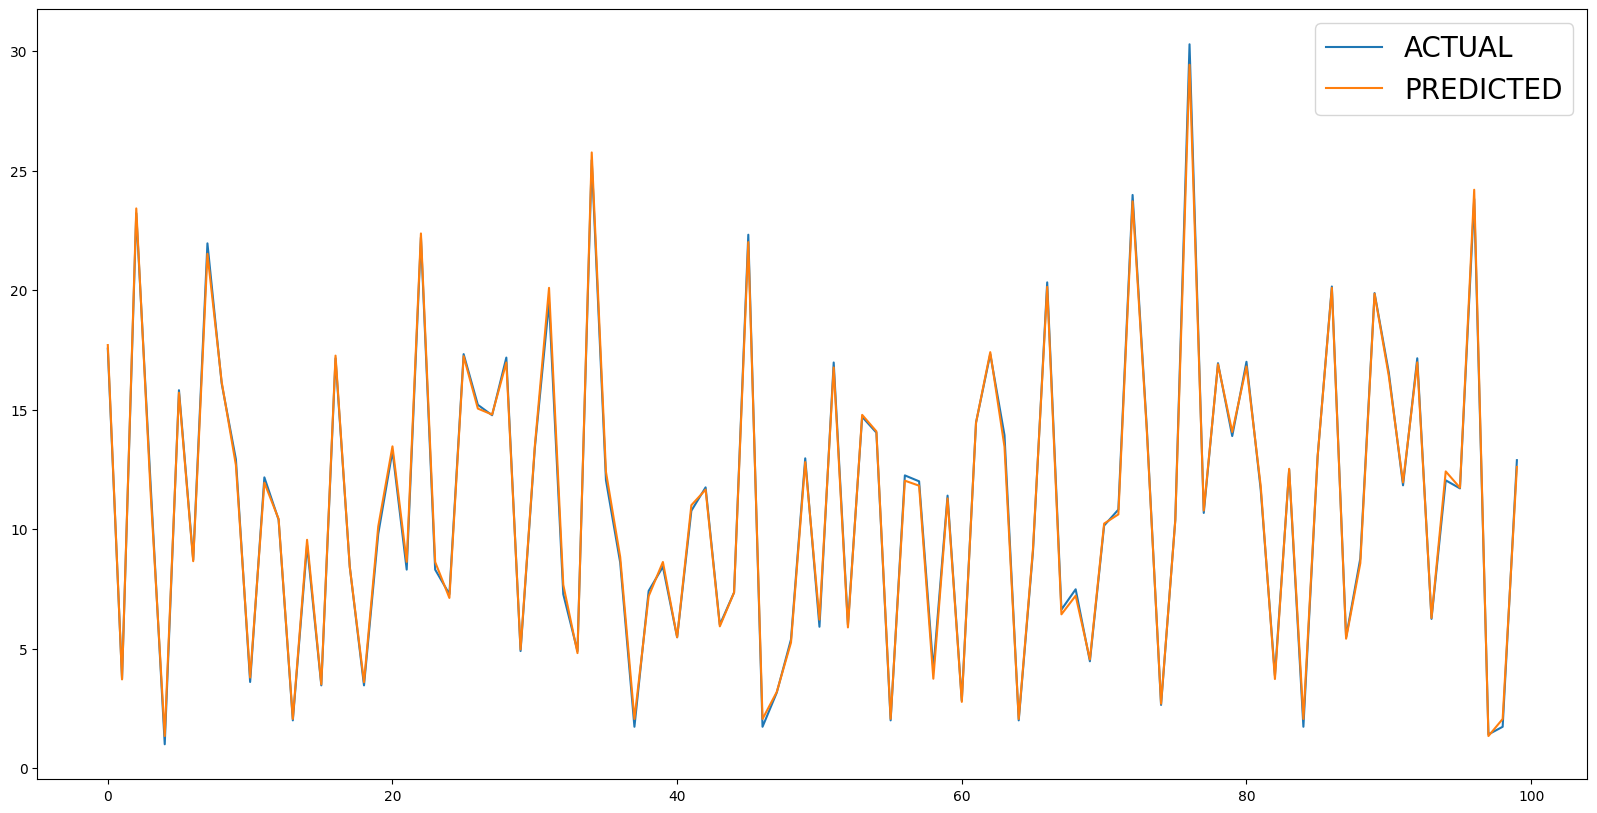

In [61]:
#calling run_model to train,fit and evalution of decision tree model
run_model(rf_grid,X_train,y_train,X_test,y_test)

In [64]:
# Scale the data using scikit-learn standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Random Forest model
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Estimate the accuracy of the model with k-fold cross validation
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)

# Print the calculated scores
print("Cross-Validation Scores:", scores)

# Calculate the mean and standard deviation of the accuracy scores
print("Average Accuracy:", np.mean(scores))
print("Standard Deviation:", np.std(scores))

# Fit the model once again with the whole training dataset
rf_model.fit(X_train_scaled, y_train)

# Test the model performance with the test set
train_accuracy = rf_model.score(X_train_scaled, y_train)
test_accuracy = rf_model.score(X_test_scaled, y_test)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Cross-Validation Scores: [0.99977418 0.99968738 0.9998723  0.99986212 0.99987017]
Average Accuracy: 0.9998132321634385
Standard Deviation: 7.277898330891911e-05
Training Accuracy: 0.999976563790991
Test Accuracy: 0.9998735959637808


# **Conclusions**



We train a model to predict the number of rented bike count in given weather conditions. First, we do Exploratory Data Analysis on the data set. We look for null values that is not found in dataset and outliers and appropriately modify them. We also perform correlation analysis to extract out the important and relevant feature set and later perform feature engineering.

•	Season: We see highest number bike rentals in Summer Seasons and the lowest in Spring season.

•	Weather: As one would expect, we see highest number of bike rentals on a clear day and the lowest on a snowy or rainy day.

•	Humidity: With increasing humidity, we see decrease in the number of bike rental count.

High demand of bike at 8AM as the time of people for going to their work and 6PM time of returning to home.

Prefer more bikes in the morning

Random forest will work best as we get r-squared 87%

